In [30]:
### Import the dependencies
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist # type: ignore
from tensorflow.math import confusion_matrix # type: ignore

In [31]:
### Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [32]:
type(x_train)

numpy.ndarray

In [33]:
### Check the shape of the data
x_train.shape, y_train.shape, x_test.shape, y_test.shape ### X_train contains 60,000 images of 28x28

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [34]:
x_train[10].shape

(28, 28)

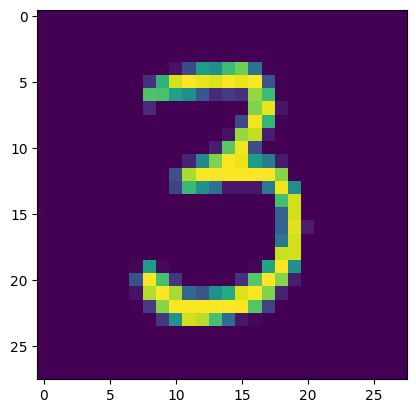

Label:  3


In [35]:
### Displaying the image

plt.imshow(x_train[50])
plt.show()

### Print the label of the image
print("Label: ", y_train[50])

In [36]:
### Unique Image Labels
unique_labels_train = np.unique(y_train)
print("Unique labels in the dataset: ", unique_labels_train)

unique_labels_test = np.unique(y_test)
print("Unique labels in the dataset: ", unique_labels_test)

Unique labels in the dataset:  [0 1 2 3 4 5 6 7 8 9]
Unique labels in the dataset:  [0 1 2 3 4 5 6 7 8 9]


In [37]:
print(x_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [38]:
### Scaling the data

x_train = x_train / 255
x_test = x_test / 255

In [39]:
print(x_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [41]:
### Building the Neural Network

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), 
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [42]:
### Compiling the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [43]:
### Training the model
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 989us/step - accuracy: 0.8471 - loss: 0.5273
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 956us/step - accuracy: 0.9546 - loss: 0.1524
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9680 - loss: 0.1066
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9755 - loss: 0.0821
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9809 - loss: 0.0663
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9842 - loss: 0.0550
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9868 - loss: 0.0457
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9886 - loss: 0.0388
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 986us/step - accuracy: 0.9896 - loss: 0.0345
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 990us/step - accuracy: 0.9903 - loss: 0.0304


In [44]:
### Accuracy of the model
loss, accuracy = model.evaluate(x_test, y_test)
print("Test accuracy: ", accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 829us/step - accuracy: 0.9592 - loss: 0.1593
Test accuracy:  0.9609000086784363


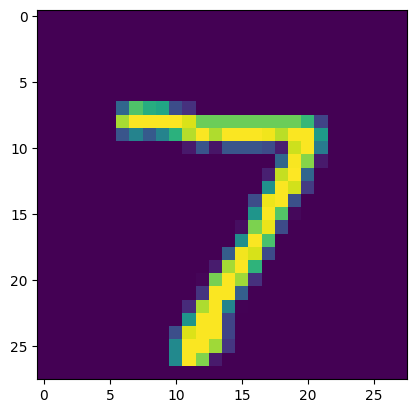

In [45]:
### 1st data point in x_test
plt.imshow(x_test[0])
plt.show()

In [46]:
print(y_test[0])

7


In [49]:
### predicting the label of the image
y_pred = model.predict(x_test)          ### gives the probability of each class

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 561us/step


In [50]:
y_pred[0]

array([1.9373475e-03, 5.4867713e-05, 8.0336541e-02, 9.9847043e-01,
       3.0004885e-09, 2.5593708e-03, 3.3734964e-12, 9.9999452e-01,
       9.8834718e-03, 9.9234623e-01], dtype=float32)

In [51]:
### Converting the probabilities to class labels

label_for_1st_image = np.argmax(y_pred[0])
print("Predicted label: ", label_for_1st_image)

Predicted label:  7


In [54]:
### Converting the probabilities to class labels
y_pred_labels = [np.argmax(i) for i in y_pred]
print(y_pred_labels)

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4), np.int64(1), np.int64(4), np.int64(9), np.int64(5), np.int64(9), np.int64(0), np.int64(6), np.int64(9), np.int64(0), np.int64(1), np.int64(5), np.int64(9), np.int64(7), np.int64(3), np.int64(4), np.int64(9), np.int64(6), np.int64(6), np.int64(5), np.int64(4), np.int64(0), np.int64(7), np.int64(4), np.int64(0), np.int64(1), np.int64(3), np.int64(1), np.int64(3), np.int64(4), np.int64(7), np.int64(2), np.int64(7), np.int64(1), np.int64(2), np.int64(1), np.int64(1), np.int64(7), np.int64(4), np.int64(2), np.int64(3), np.int64(5), np.int64(1), np.int64(2), np.int64(4), np.int64(4), np.int64(6), np.int64(3), np.int64(5), np.int64(5), np.int64(6), np.int64(0), np.int64(4), np.int64(1), np.int64(9), np.int64(5), np.int64(7), np.int64(8), np.int64(9), np.int64(3), np.int64(7), np.int64(4), np.int64(6), np.int64(4), np.int64(3), np.int64(0), np.int64(7), np.int64(0), np.int64(2), np.int64(9), np.int64(1), np.int64(7), np.int64(3)

In [56]:
### Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred_labels)
print(conf_mat)

tf.Tensor(
[[ 958    0    0    1    5    1    6    0    3    6]
 [   0 1110    1    2    2    0    3    2   14    1]
 [   3    5  973   18    5    0    4   10   14    0]
 [   0    0    1  987    1    3    0    3    5   10]
 [   0    0    1    0  944    0    7    0    5   25]
 [   1    1    0   25    3  835    9    1   10    7]
 [   1    2    1    1    2    4  945    0    2    0]
 [   0    1    8    8    5    0    1  947    2   56]
 [   4    0    3   23    4    1    3    2  926    8]
 [   0    2    0    8    6    4    2    0    3  984]], shape=(10, 10), dtype=int32)


<Axes: >

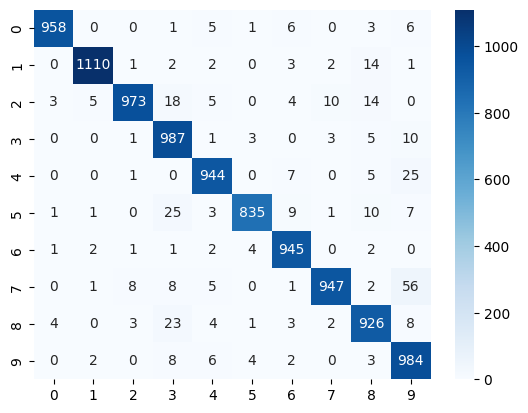

In [57]:
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')